# Lab | Customer Analysis Round 5

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.


### 1. Get the data

We are using the `marketing_customer_analysis.csv` file.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")


### 2. Dealing with the data

Already done in the round 2.



In [3]:
data.shape

(9134, 24)

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
# standardize column names: lower letter, replace spaces by _
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ','_')
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

### 3. Explore the data

Some datasets have values that are missing, invalid, or otherwise difficult for an algorithm to process. If data is missing, the algorithm can’t use it. If data is invalid, the algorithm produces less accurate or even misleading outcomes. Some datasets are relatively clean but need to be shaped (e.g., aggregated or pivoted) and many datasets are just lacking useful business context (e.g., poorly defined ID values), hence the need for feature enrichment. Good data preparation produces clean and well-curated data which leads to more practical, accurate model outcomes.


   **3.1.- Determine the problems**
    
   **3.2.- Data cleaning** Cleaning the data is very important as the model learning from that data only, so if we feed inconsistent, appropriate data to model it will return garbage only, so it is required to make sure that the data does not contains any unseen problem.
     
       - Feature and Target Variables
       - Data Types
       - Missing data, check null values
       - Outliers
       - Duplicate data
        
   **3.3.- Feature selection** (Which variables are important to answer our questions?)
    
   **3.4.- Data transformation**

In [6]:
#3.1 Determine the problems
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [7]:
#3.2 Data cleaning
#show data types

data.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [8]:
# show null values
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


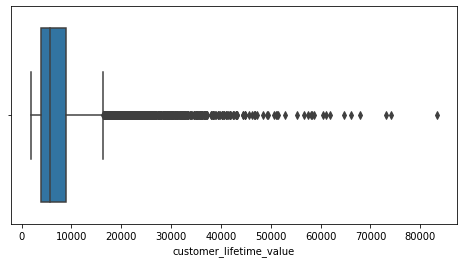

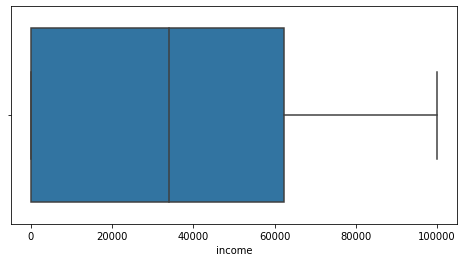

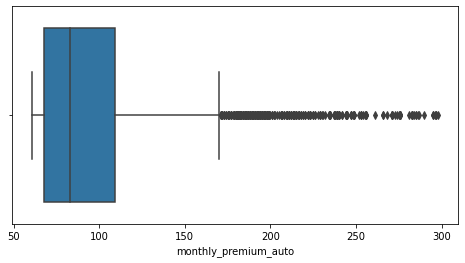

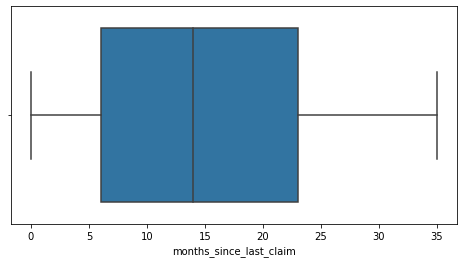

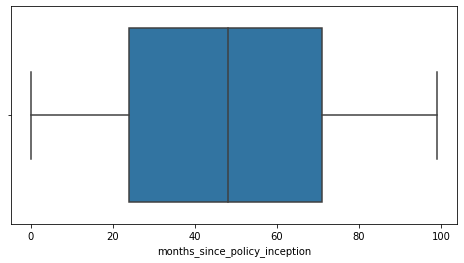

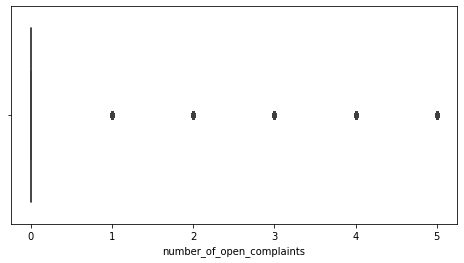

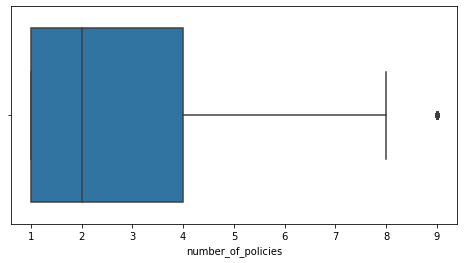

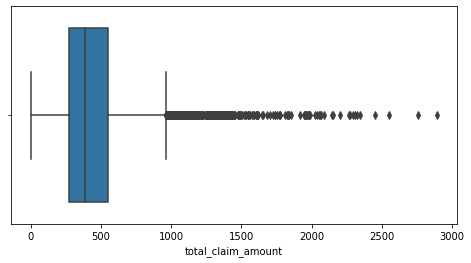

In [10]:
#store numericals in list and plot outliers

numericals = list(data.select_dtypes(include=[np.number]).columns.values)

for column in numericals:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[column])
    plt.show()

In [11]:
#remove outliers in customer_liefetime_value, monthly_premium_auto, total_claim amount, number_of_policies
#1. find interquartile range
#2. cap outliers in iqr for the 4 columns
outliers = ['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount', 'number_of_policies']

for column in outliers:
    iqr = np.percentile(data[column],75) - np.percentile(data[column],25)
    upper_limit = np.percentile(data[column],75) + 1.5*iqr
    lower_limit = np.percentile(data[column],25) - 1.5*iqr
    data.loc[data[column] > upper_limit, column] = upper_limit
    data.loc[data[column] < lower_limit, column] = lower_limit

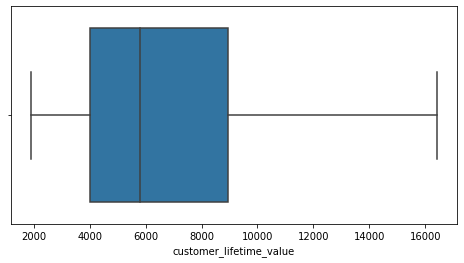

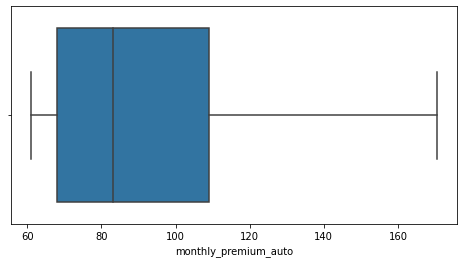

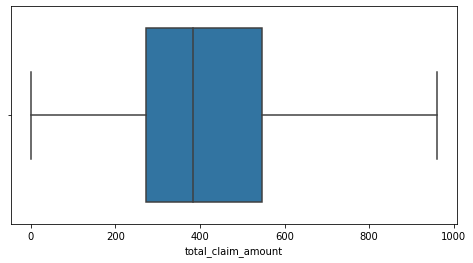

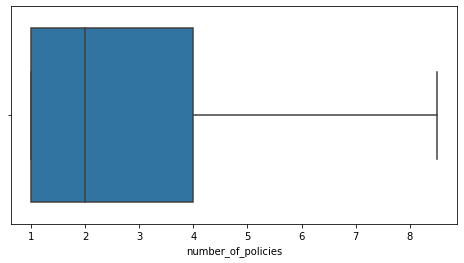

In [12]:
#check
for checks in outliers:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=data[checks])

In [13]:
#check correlations
data_corr = data.corr()
data_corr

#only 3 insignificant values: total_claim_amount/monthly_premium_auto (0.573757) &customer_lifetime_value/monthly_premium_auto (0.437610)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.030241,0.437610,0.007527,-0.002747,-0.044164,0.111920,0.225322
income,0.030241,1.000000,-0.019880,-0.026715,-0.000875,0.006408,-0.008601,-0.382622
monthly_premium_auto,0.437610,-0.019880,1.000000,-0.000731,0.018061,-0.014048,-0.013378,0.573757
months_since_last_claim,0.007527,-0.026715,-0.000731,1.000000,-0.042959,0.005354,0.009691,-0.000303
months_since_policy_inception,-0.002747,-0.000875,0.018061,-0.042959,1.000000,-0.001158,-0.013037,-0.006362
number_of_open_complaints,-0.044164,0.006408,-0.014048,0.005354,-0.001158,1.000000,0.001867,-0.016279
number_of_policies,0.111920,-0.008601,-0.013378,0.009691,-0.013037,0.001867,1.000000,-0.003138
total_claim_amount,0.225322,-0.382622,0.573757,-0.000303,-0.006362,-0.016279,-0.003138,1.000000


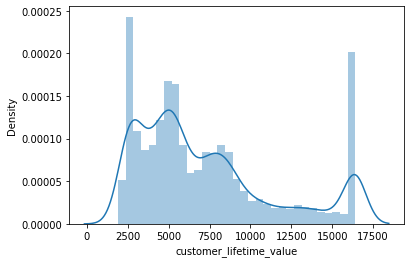

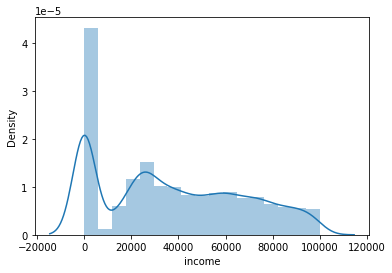

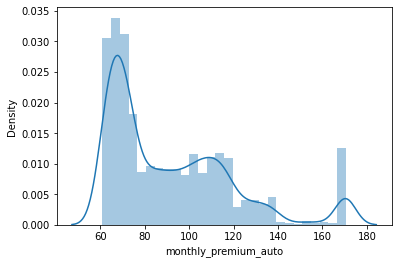

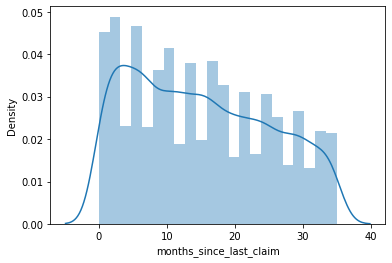

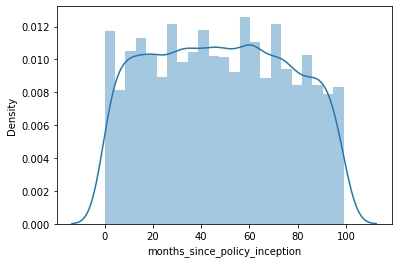

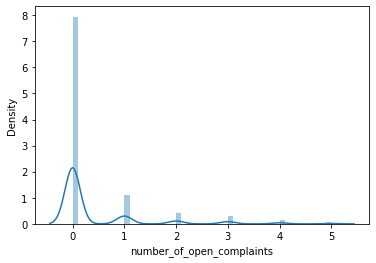

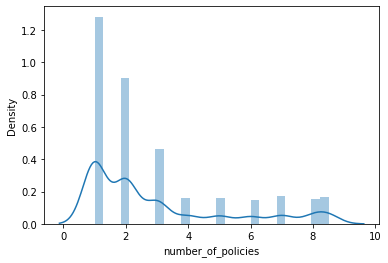

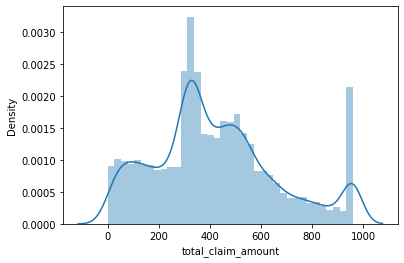

In [14]:
# show distributions for numericals

for columns in numericals:
    plt.figure(figsize=(6,4))
    sns.distplot(data[columns])
    plt.show()

In [15]:
# none of the columns look similiar to a normal distribution; 
#For which column does it make sense to do log, boxcox ? I dont really get the logic when to apply what here in this case :) 

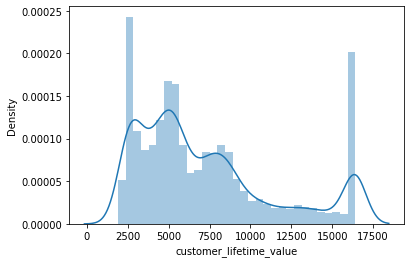

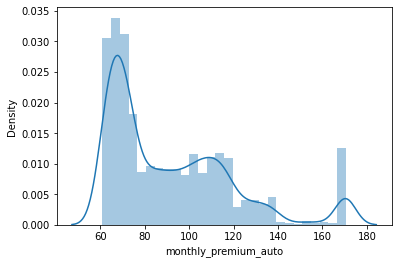

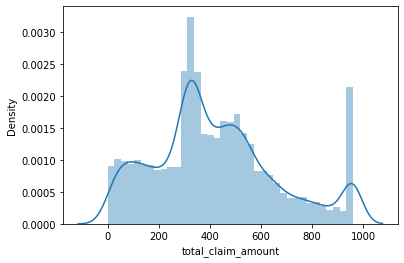

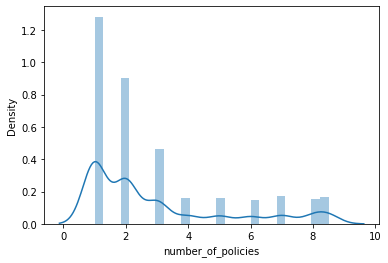

In [56]:
#boxcox for all 4 I removed outliers, not sure if this is smart? 
#income does not work since there are negative numbers, how do I replace them with 0?

boxcox =['customer_lifetime_value', 'monthly_premium_auto', 'total_claim_amount', 'number_of_policies']
for column in boxcox:
    stats.boxcox(data[column])
    plt.figure(figsize=(6,4))
    sns.distplot(data[column])
    plt.show()

### 4. Processing Data

(_Further processing..._)

- X-y split.
- Normalize (numerical).

In [16]:
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
data_c =data.copy()
data_c

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1.0,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8.0,Personal Auto,Personal L3,Offer3,Agent,960.399730,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2.0,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7.0,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1.0,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,16414.039912,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2.0,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1.0,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2.0,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3.0,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [58]:
data_c.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto             float64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies               float64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [47]:
c_numbers = data_c.select_dtypes(include=[np.number])
c_objects = data_c.select_dtypes(include=[np.object])
c_numbers.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto             float64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies               float64
total_claim_amount               float64
dtype: object

In [59]:
#model before normalizing

c_x = c_numbers.drop(['total_claim_amount'], axis=1)
c_y = c_numbers['total_claim_amount']

lg = LinearRegression()
modelstart = lg.fit(c_x,c_y)
c_predictions = lg.predict(c_x)
c_rmse = mean_squared_error(c_y, c_predictions, squared=False)

print("R2_score:", round(lg.score(c_x,c_y),2))
print("RMSE:", c_rmse)

c_x = sm.add_constant(c_x)  #add constant
model = sm.OLS(c_y,c_x).fit() #train model

print(model.summary())

R2_score: 0.47
RMSE: 175.28375449236913
                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     1145.
Date:                Sun, 13 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:37:55   Log-Likelihood:                -60151.
No. Observations:                9134   AIC:                         1.203e+05
Df Residuals:                    9126   BIC:                         1.204e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [60]:
data_n = data.copy()

In [61]:
#x-y split
y = data_n['total_claim_amount']
x = data_n.drop(['total_claim_amount'], axis=1)
X_num = x.select_dtypes(include = np.number)
X_cat = x.select_dtypes(include = np.object)

In [62]:
#normalize with Normalizer
transformer = Normalizer() 
transformer.fit(X_num)

x_normalized = transformer.transform(X_num)
pd.DataFrame(x_normalized)
x_normalized.shape

(9134, 7)

In [63]:
#normalize with StandardScaler
transformer = StandardScaler()
transformer.fit(X_num)
x_standardized = transformer.transform(X_num)
data_sn = pd.DataFrame(x_standardized)
x_normalized.shape

(9134, 7)

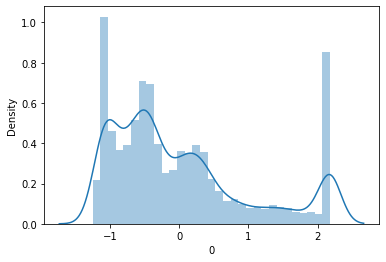

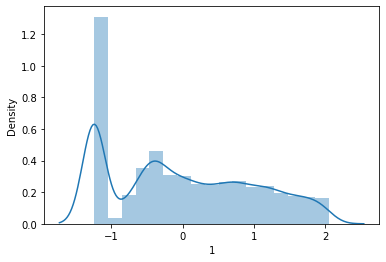

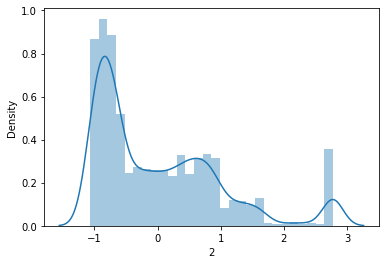

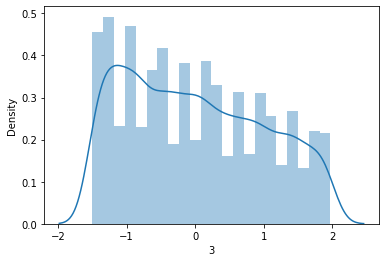

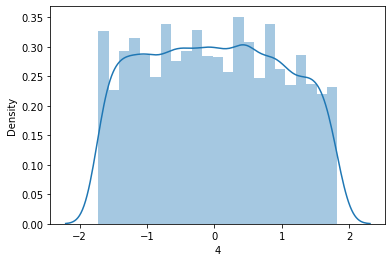

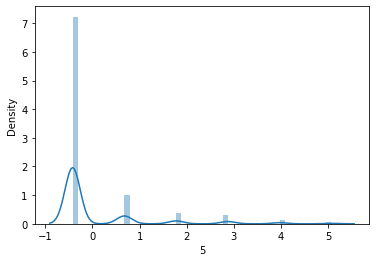

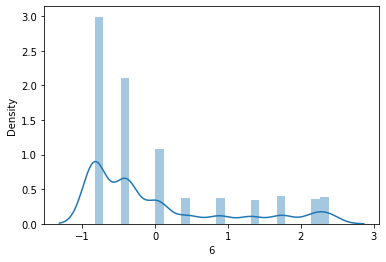

In [64]:
#plot 

for column in data_sn:
    plt.figure(figsize=(6,4))
    sns.distplot(data_sn[column])
    plt.show()

In [ ]:
#I dont know if anything changed, curves still look not normalized
#any tips?
#do I need to retransform anything?



#model after normalizing

